<b><font size = 18> Day2: January 31st </font></b>
<br></br>


<u>Introduction to tensorflow</u>
<br></br>
What is the MNIST data set?

There are many different MNIST data sets, but in this project we will be using the MNIST data set of hand written digits. It's a training set of 60,000 hand written digits and a test set of 10,000 hand written digits. Image recognition is one of the basic forms of machine learning application and is similar to the 'Hello World' of mahine learning.

<center><b>Fig 1. Example of MNIST data of written digits</b></center>

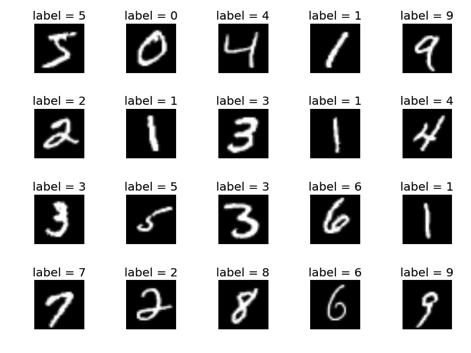

